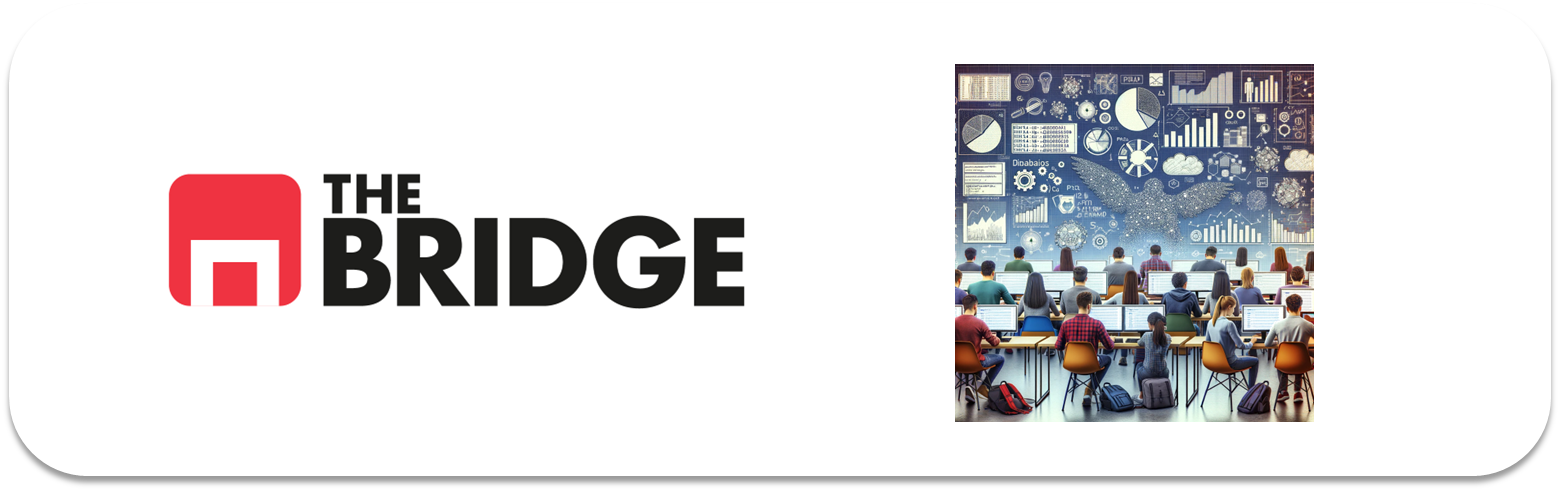

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('data/hard_to_find/obligatoria_hard.csv', delimiter='|')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
# train : the first rows 
# test : the last rows 
n_split = 350
train_set = df.iloc[:n_split]
test_set = df.iloc[n_split:]
target = "MEDV"
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 12)
(156, 12)
(350,)
(156,)


<Axes: xlabel='MEDV', ylabel='Count'>

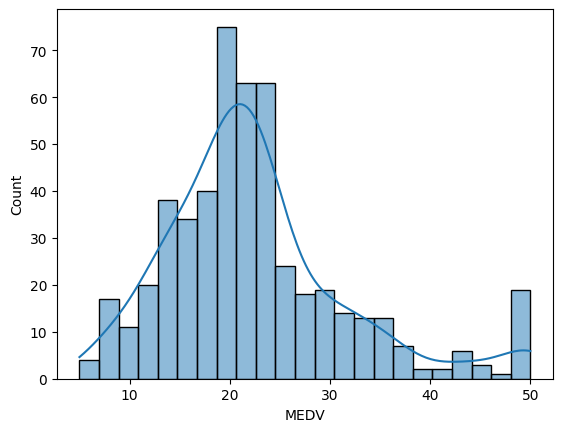

In [22]:
sns.histplot(df[target], kde= True)

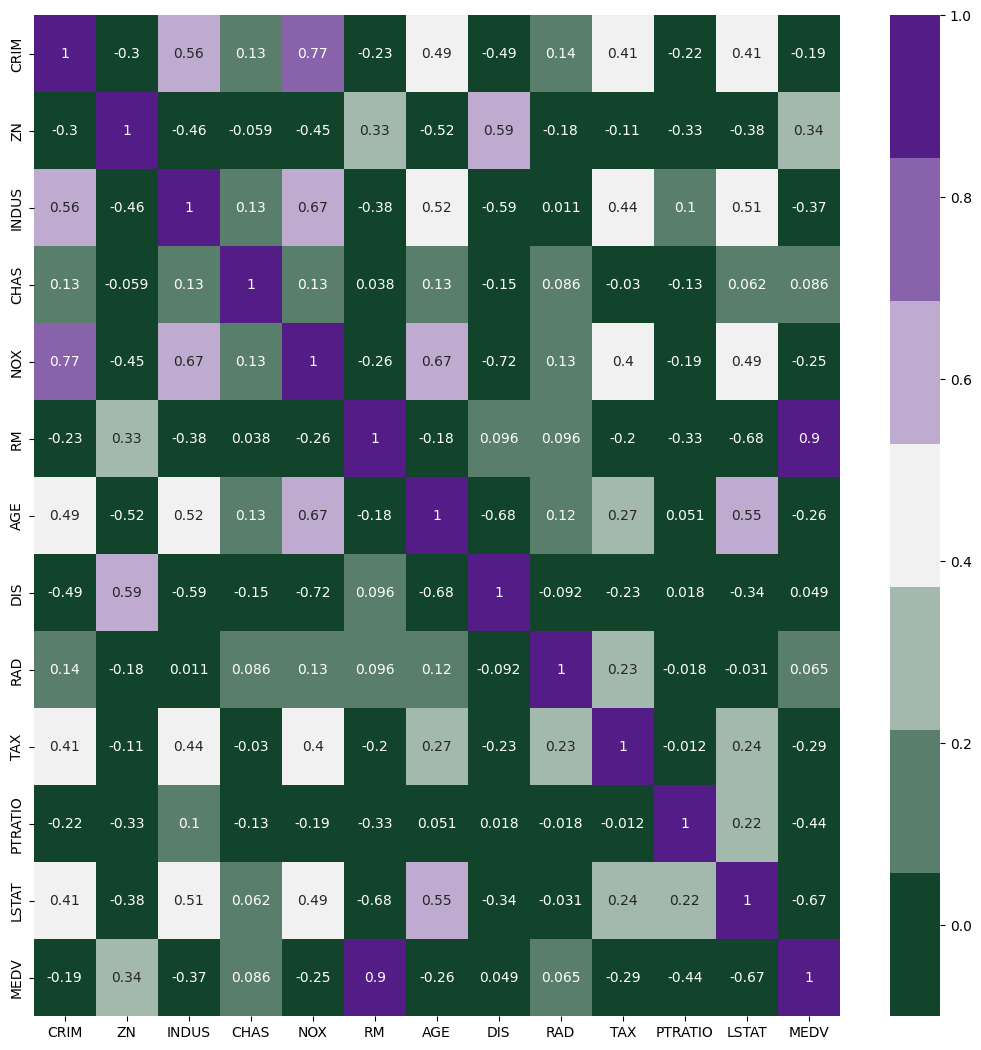

In [23]:
plt.figure(figsize=(13,13))
sns.heatmap(train_set.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

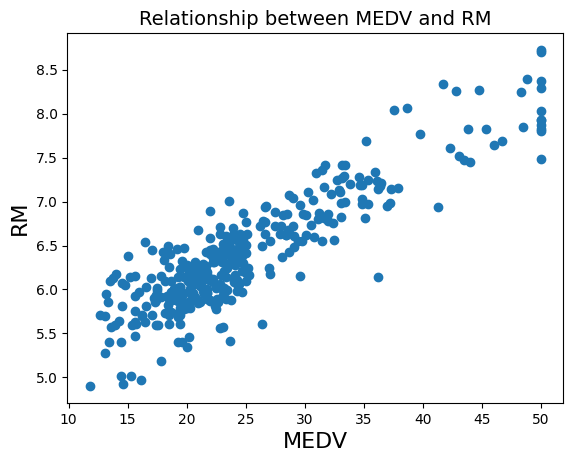

In [24]:
plt.scatter(train_set[target], train_set['RM'])
plt.xlabel(target, fontsize=16)
plt.ylabel('RM', fontsize=16)
plt.title("Relationship between MEDV and RM", fontsize=14)
plt.show()

### Excluyo CHAS, RAD y DIS por su baja correlación con la variable MEDV y también excluyo CRIM por su relación con NOX. NOX Y AGE a pesar de su baja correlación no las excluyo

In [26]:
exclude = ["CHAS","RAD","DIS","CRIM"]
X_train = X_train.drop(columns= exclude)
X_test = X_test.drop(columns = exclude)

## Modelo de regresión lineal

In [93]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


Regresion Lineal
MAE : 5.5336
MSE : 69.6296
RMSE: 8.3444
R2  : -0.0487


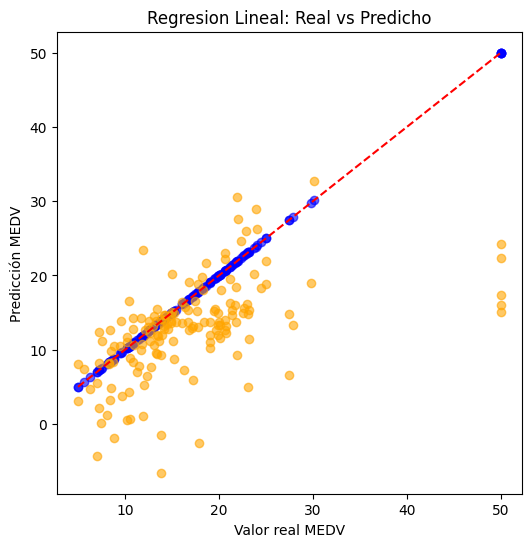

Train MSE: 10.68077831590135
Test MSE: 96.58997433582701


In [111]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nRegresion Lineal")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2  : {r2:.4f}")

plt.figure(figsize=(6,6))
#Reales
plt.scatter(y_test, y_test, 
            color="blue", alpha=0.6, label="Valores reales")

#Predicciones
plt.scatter(y_test, y_pred, 
            color="orange", alpha=0.6, label="Predicciones")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--r')
plt.xlabel("Valor real MEDV")
plt.ylabel("Predicción MEDV")
plt.title("Regresion Lineal: Real vs Predicho")
plt.show()

print("Train MSE:", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr.predict(X_test)))

### Aplico los tres modelos de regularización para ver si me dan mejores valores y juego con los pesos en los tres para identificar cual tendrá una mejor aceptación

## RIDGE

In [105]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE sin regularización: 10.68
Test MSE sin regularización: 96.59
Train MSE: 10.99
Test MSE: 88.52


In [107]:
ridgeR = Ridge(alpha = 50) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE: 13.99
Test MSE: 78.38


In [108]:
ridgeR = Ridge(alpha = 90) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE: 16.64
Test MSE: 77.37


## LASSO

In [59]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 10.68
Test MSE sin regularización: 96.59
Train MSE: 10.7258
Test MSE: 92.9724


In [103]:
lassoR = Lasso(alpha = 0.5) 
lassoR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE: 11.7872
Test MSE: 80.9794


In [66]:
lassoR = Lasso(alpha = 1.2) 
lassoR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE: 16.6788
Test MSE: 69.6296


## ElasticNet

In [61]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.2, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 13.2143
Test MSE: 78.7308


In [104]:
elastic_net = ElasticNet(alpha = 0.5, l1_ratio=0.9)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 13.2724
Test MSE: 76.5961


In [43]:
elastic_net = ElasticNet(alpha = 1, l1_ratio=1)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 14.9145
Test MSE: 71.3746


### A continuación incluyo un dataframe con todos lo valores obtenidos en cada uno de los modelos y se comprueba que el mejor es LASSO

In [109]:
def get_metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

results = []

# Regresion lineal
y_pred_lr = lr.predict(X_test)
metrics_lr = get_metrics(y_test, y_pred_lr)
metrics_lr["Modelo"] = "Regresión Lineal"
results.append(metrics_lr)

# Ridge
y_pred_ridge = ridgeR.predict(X_test)
metrics_ridge = get_metrics(y_test, y_pred_ridge)
metrics_ridge["Modelo"] = "Ridge (alpha=90)"
results.append(metrics_ridge)

# Lasso
lasso_12 = Lasso(alpha=1.2, max_iter=10000)
lasso_12.fit(X_train, y_train)
y_pred_lasso_12 = lasso_12.predict(X_test)
metrics_lasso_12 = get_metrics(y_test, y_pred_lasso_12)
metrics_lasso_12["Modelo"] = "Lasso (alpha=1.2)"
results.append(metrics_lasso_12)

# ElasticNet
elastic_1 = ElasticNet(alpha=1, l1_ratio=1, max_iter=10000)
elastic_1.fit(X_train, y_train)
y_pred_elastic_1 = elastic_1.predict(X_test)
metrics_elastic_1 = get_metrics(y_test, y_pred_elastic_1)
metrics_elastic_1["Modelo"] = "ElasticNet (a=1, l1=1)"
results.append(metrics_elastic_1)

results_df = pd.DataFrame(results)
results_df = results_df.set_index("Modelo").round(4)
results_df.sort_values("RMSE")

,MAE,MSE,RMSE,R2
Modelo,,,,
Lasso (alpha=1.2),5.5336,69.6296,8.3444,-0.0487
"ElasticNet (a=1, l1=1)",5.5379,71.3746,8.4484,-0.0749
Ridge (alpha=90),6.0468,77.3731,8.7962,-0.1653
Regresión Lineal,6.5320,96.5900,9.8280,-0.4547


## CONCLUSION
En este trabajo se ha construido un modelo de regresión lineal para predecir el valor medio de las viviendas (MEDV) en el área de Boston. Tras un análisis exploratorio inicial, se seleccionaron las variables con mayor relación con el target y se eliminaron aquellas con baja correlación o alta relación con otras (CHAS, RAD, DIS y CRIM).

El modelo base de regresión lineal mostró un buen ajuste en entrenamiento, pero gran diferencia respecto al conjunto de test, indicando cierto riesgo de sobreajuste.

Para mejorar la capacidad de generalización, se aplicaron técnicas de regularización, probando distintos valores en las tres regularizaciones. El modelo LASSO con alpha = 1.2 obtuvo el mejor equilibrio entre error en test (menor RMSE) y simplicidad del modelo.

Por tanto, el modelo final elegido es LASSO, ya que presenta un mejor rendimiento predictivo y estabilidad.